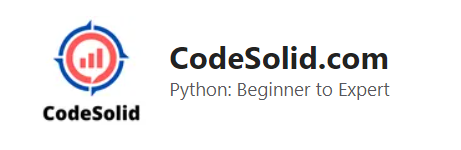

# Serializing Python Classes To and From JSON Directly
(https://codesolid.com/python-json-easily-work-with-dictionaries-files-and-custom-objects/?utm_content=cmp-true)


The first approach is to add the methods to_json and from_json directly to the Restaurant class. These methods will take care of converting our objects to and from JSON strings. Here’s how that might look:

# The Easiest Way To Use JSON: The Python Dictionary Object
Python dictionaries are perfect for encoding and decoding JSON data because they:

Are easy to manipulate in Python
Share a similar key/value structure with JSON object data
Tip: If you need a refresher on dictionary objects, see our beginner article, Python Dictionaries for Beginners: A Complete Lesson With Exercises.

To encode Python dictionaries to JSON, we can use the json.dumps() method. This method accepts a Python dictionary as its input, and returns a JSON string. To remember the name of this method, think about dumping a dictionary into a string (hence, “dumps”). Here’s an example:

# Example A

In [4]:
import json
#from pprint import pprint

# Create a Python dictionary object
website = {"url": "https://de.wikipedia.org/wiki/Baum", "editor": "Pilz Thias", "topics": ["Maya, Baumstamm, Samsalai"]}

# json.dumps - dump the dictionary to a JSON string
json_string = json.dumps(website)
print(f"Dumps convered a type, {type(website)} to JSON as a type, {type(json_string)}.")
print("String value:")
print(json_string)

Dumps convered a type, <class 'dict'> to JSON as a type, <class 'str'>.
String value:
{"url": "https://de.wikipedia.org/wiki/Baum", "editor": "Pilz Thias", "topics": ["Maya, Baumstamm, Samsalai"]}


# Reading and Writing Custom Python Classes to JSON
So far, working with JSON in Python has been relatively straightforward and in keeping with the Python “batteries included” philosophy. In addition, however, the Python JSON library allows fine-grained control via custom encoders and decoders. These allow you to convert json data to and from Python objects that don’t look like Python dictionaries. This is useful if you’re working with JSON data that doesn’t quite fit the mold of a standard Python dictionary– for example, if your json data contains database records with fields that are not necessarily named the same thing as Python dictionary keys (i.e., “first_name” vs. “FirstName”). Another advantage to this approach is that classes, unlike dictionaries, tend to better document the state of a “valid object”, so from a maintainability perspective, they may be preferred. Technically speaking, you can add data elements dynamically to a class at any time, but in practice, programmers are sometimes more tempted to make ad hoc additions to dictionary keys than to class properties.

We can add the ability to convert the class to a JSON string and load a class from a JSON string to the class itself.
We can write code to interoperate with the python json module. The approach I’ve chosen here is a custom JSONEncoder and JSONDecoder.
Let’s show both of these approaches in turn, and to keep things simple, we’ll use the same class for all our examples:

In [5]:
class seatmate:
    def __init__(self, name: str, age: int,  magnicht: str):
        self.name = name
        self.age = age
        self.magnicht = magnicht
        

# Example B: Serializing Python Classes To and From JSON Directly
The first approach is to add the methods to_json and from_json directly to the Restaurant class. These methods will take care of converting our objects to and from JSON strings. Here’s how that might look:

In [6]:
import json


class seatmate:
    def __init__(self, name: str, age: int,  magnicht: str):
            self.name = name
            self.age = age
            self.magnicht = magnicht

    def __repr__(self):
            return f'Seatmate(name="{self.name}", age={self.age}, magnicht={self.magnicht})'

    def to_json(self):
            return json.dumps(self.__dict__)


    @classmethod
    def from_json(cls, json_str: str):
        dct = json.loads(json_str)
        print(dct)
        print(cls(**dct))
        return cls(**dct)
    
Mikoway = seatmate("Mikoway", 17, "Kevins scheiß musik")

print(f"Object:  {Mikoway}")

print(f"JSON version: {Mikoway.to_json()}")

Mikoway2 = seatmate.from_json(Mikoway.to_json())

print(f"Reloaded Object:  {Mikoway2}")

print(Mikoway2.name)

Object:  Seatmate(name="Mikoway", age=17, musicgenre=Kevins scheiß musik)
JSON version: {"name": "Mikoway", "age": 17, "musicgenre": "Kevins schei\u00df musik"}
{'name': 'Mikoway', 'age': 17, 'musicgenre': 'Kevins scheiß musik'}
Seatmate(name="Mikoway", age=17, musicgenre=Kevins scheiß musik)
Reloaded Object:  Seatmate(name="Mikoway", age=17, musicgenre=Kevins scheiß musik)
Mikoway


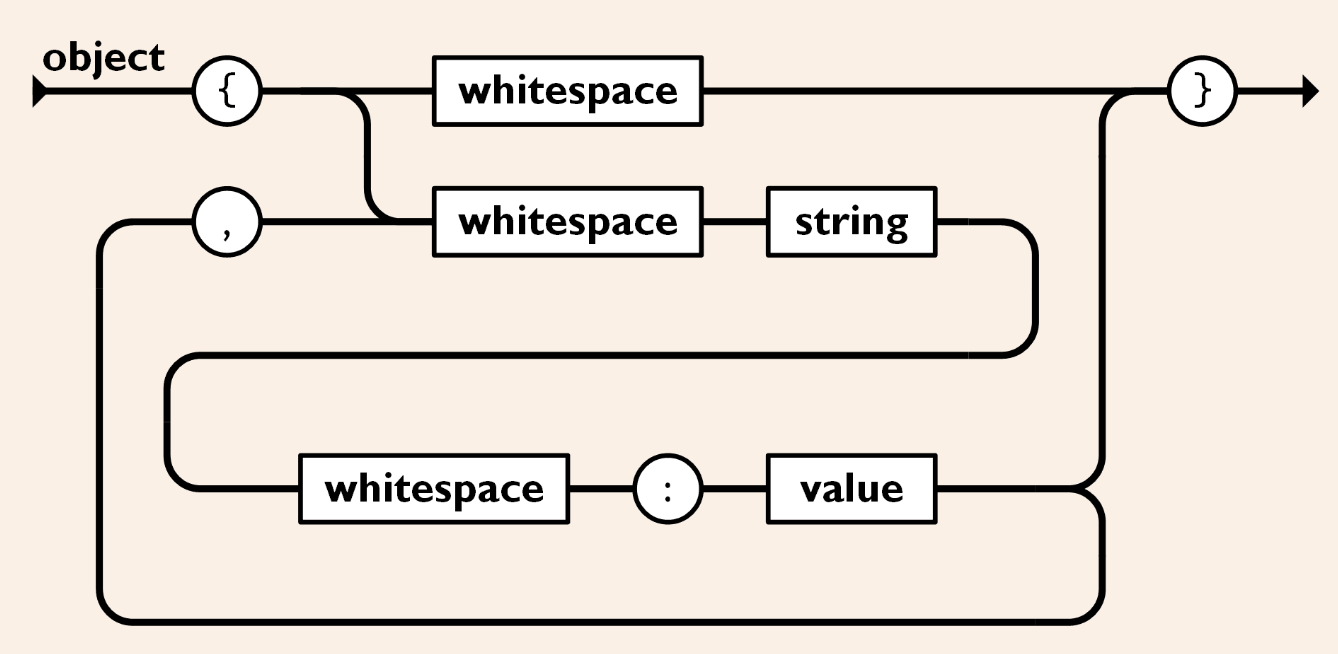


## Discussion: to_json
You’ll notice that in this example, we’ve kept the names in the JSON the same as in the class, but often when we’re inter-operating with JavaScript, we might change the names appropriately to match front-end naming conventions or other requirements. For a class like this that does not include any nested objects, we can implement to_json even more simply, as follows:
![image.png](attachment:image.png)
If you need more precise control over the formatted string than what’s shown here, see Python Format Strings for some techniques you may find useful.

## Discussion: from_json
We’ve implemented from_json as a @classmethod. This is appropriate because we want to be able to call it without an existing object, as we do on line 30. We take the approach of first loading the JSON string to a dictionary, then using the dictionary unpacking operator, “**“, on line 24, passing the result to the class itself. This has the effect of calling the __init__ method on the class and with the set of key/value pairs from the dictionary, so it assumes that the __init__ method has a parameter for all the keys, as is the case here.


# ASSIGNMENT (ADD YOUR CODE - CHUNKS AND EXPLANATIONS WITHIN THIS NOTEBOOK)

1. Create your own favourite WEBSITE as a data dictionary. Store your dictionary in <name>_dict and print type(<name>_dict). Then create a JSON String from the dictionary and print it. Include the appropriate screenshots from:
https://www.json.org/json-en.html
as Markdown in your Notebook. Explain the usage of the array and object data structure....
    
2. Create a class "Seatmate" similar to Restaurant. Agree upon the necessary Attributes and serialize your seatmate-object "to and from JSON". You can use the source code from "Example B". Make sure to implement the suggested "self.\_\_dict__" method in order to transform your seatmate object into a dictionary and simplify the json.dump.